<img src="logo_ESPRIT.jpg" width="300" align="right"></a>
<img src="breast.jpg" width="130" align="left"></a>

<h1 align="center"><font size="5">Projet Machine Learning2_5Mécat</font></h1>

Ce Porjet doit être rédigé et sera évalué. Le code python produit doit être inclus. Pour la mise en page et le format, il est préférable de le rendre sous la forme d’un notebook Jupyter, ou alors d’un document pdf. Les noms doivent apparaître dans le document. Il doit être envoyé le 28 novembre 2020 au plus tard à l’adresse suivante.
lotfi.ncib@esprit.tn 

# Objectif du projet
L'objectif de ce projet est de:
- Tester quatre algorithmes de classification (K_nearst neighbors, Arbre de décision, Régression Logistique et Gaussian Naive Bayes) pour la résolution d'un problème de classification binaire(deux classes)
- Régler le maximum de paramètres pour chaque algorithme
- Tracer la matrice de confusion et afficher __classification_report__ de chaque algorithme
- Choisir le meilleur algorithme en utilisant __classification_report__

# Base de données __breast_cancer__

Pour ce projet on considère un jeu de données médicales. Chaque exemple correspond à une tumeur du sein. Les variables explicatives portent sur des caractéristiques observées de la tumeur. La variable à prédire indique s’il s’agit d’une tumeur maligne (4) ou bénigne (2). 

In [2]:
Nom des membres :
'Ahmed Marouani
'Ahmed Rahmouni'
'Mongia ben oun'
'mohamed amin dhaher'

SyntaxError: invalid syntax (<ipython-input-2-7f3dc476d926>, line 1)

In [5]:
# Chargement des bibliothèques
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Importer l'ensemble de données avec read_csv:  Variables __breast_cancer

In [6]:
pd.read_csv('Variables_breast_cancer.csv')

,name,type,description
0,clump_thickness,integer,Value range: 1-10
1,uniformity_of_cell_size,integer,Value range: 1-10
2,uniformity_of_cell_shape,integer,Value range: 1-10
3,marginal_adhesion,integer,Value range: 1-10
4,single_epithelial_cell_size,integer,Value range: 1-10
5,bare_nuclei,integer,Value range: 1-10
6,bland_chromatin,integer,Value range: 1-10
7,normal_nucleoli,integer,Value range: 1-10
8,mitosis,integer,Value range: 1-10
9,class,integer,"Predictor Value: 2 for benign, 4 for malignant"


#### Question 1: Créer une variable `data` à qui vous affectez la base de données `breast_cancer.csv`

In [7]:
data=pd.read_csv('breast_cancer.csv')

In [8]:
data

,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitosis,class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...
564,4,1,1,1,2,1,3,2,1,2
565,5,7,10,10,5,10,10,10,1,4
566,3,1,2,1,2,1,3,1,1,2
567,4,1,1,1,2,3,2,1,1,2


#### Question 2: Quelle est la dimension de `data`?

In [9]:
data.shape

(569, 10)

#### Question 3:  En utilisant la méthode `head` (resp la méthode `tail` ) afiicher les trois premières lignes de `data`(resp les trois dérnières lignes de `data`)

In [10]:
data.head(3)


,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitosis,class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2


In [11]:
data.tail(3)

,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitosis,class
566,3,1,2,1,2,1,3,1,1,2
567,4,1,1,1,2,3,2,1,1,2
568,8,4,4,1,6,10,2,5,2,4


#### Question 4: Dans un seul fichier afficher les statistiques nécessaires pour `data` 

In [12]:
data.describe()


,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitosis,class
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,4.539543,3.184534,3.265378,2.845343,3.298770,-2632.518453,3.490334,2.989455,1.637961,2.731107
std,2.896501,3.002236,2.955935,2.873626,2.304775,16035.653408,2.324925,3.091315,1.773941,0.964018
min,1.000000,1.000000,1.000000,1.000000,1.000000,-100000.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,2.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,8.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


#### Question 5:Extraire de `data` : les observations dans une variable`X` et les classes dans une variable `y`


In [13]:
X = data.drop(["class"],axis=1)
y = data["class"]
print(X.shape)

(569, 9)


#### Question 6: Diviser l'ensemble des observations X et l'ensemble de classes y, chacun en deux sous-ensembles :
- un sous-ensemble d'apprentissage : 80% de l'ensemble initial
- un sous-ensemble de test : 20% de l'ensemble initial
##### __Indication__ : Fixer à 0 le générateur aléatoire

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=0)
print(y_test)

512    2
457    4
439    2
298    2
37     2
      ..
213    4
519    4
432    2
516    2
500    2
Name: class, Length: 114, dtype: int64


# K Nearest Neighbor(KNN)

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

#### En utilisant la méthode GridSearchCV, identifier le meilleur nombre de voisin (tester les valeurs de $n_{neighbors}\in \{1,2,3...25\}$, ainsi que la meilleur distance à utiliser (tester les valeurs de $p\in \{1,2,3,4,5,6 \}$

In [16]:
grid_param={'n_neighbors': np.arange(1,26), 'p':np.arange(1,7)}
grid=GridSearchCV(KNeighborsClassifier(), grid_param, cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25]),
                         'p': array([1, 2, 3, 4, 5, 6])})

#### Afficher les meilleures valeurs des hyperparamètres réglés

In [17]:
grid.best_params_

{'n_neighbors': 5, 'p': 3}

#### Créer une instance __`final_model_knn`__ de l'algorithme de classification par KNN en utilisant les meilleurs hyperparamètres trouvés dans la question précédente
#### Entrainer __`final_model_knn`__ sur le sous-ensemble de données approprié.

In [30]:
from sklearn.neighbors import KNeighborsClassifier
final_model_knn=KNeighborsClassifier(n_neighbors=5,p=3)
final_model_knn.fit(X_train, y_train)

KNeighborsClassifier(p=3)

#### Tracer la matrice de confusion de __`final_model_knn`__

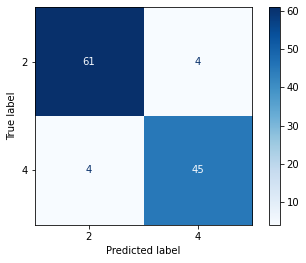

In [31]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(final_model_knn, X_test, y_test,cmap=plt.cm.Blues)  
plt.show()

### Afficher le __`classification_report`__ de __`final_model_knn`__

In [32]:
from sklearn.metrics import classification_report
ypred = final_model_knn.predict(X_test)
print(classification_report(y_test, ypred))

              precision    recall  f1-score   support

           2       0.94      0.94      0.94        65
           4       0.92      0.92      0.92        49

    accuracy                           0.93       114
   macro avg       0.93      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114



# Pour les autres algoritmes vous allez suivre pratiquement le meme raisonnement.

# Decision Tree

#### Importer le modèle __`DecisionTreeClassifier`__ à partir du module __`tree`__ du module __`sklearn`__.

In [33]:
from sklearn.tree import DecisionTreeClassifier

#### Créer un dictionaire __`param_grid`__, en vue de configurer les trois hyperparamètres suivants :
##### - __`criterion`__ : qui peut être soit l'indice de Gini soit l'entropie
##### - __`max_depth`__ : qui varie de 1 à 19
##### - __`splitter`__ : qui peut être soit best ou random

In [34]:
param_grid={'criterion': ['gini', 'entropy'] , 'max_depth':np.arange(1,20), 'splitter': ['best', 'random']}

#### Créer une instance de recherche par grille appliquée sur l'algorithme de classification par arbre de décision. La recherche doit tester toutes les combinaisons des valeurs des hyperparamètres de la grille de la question précédente. La recherche doit se faire à travers une validation croisée à 5 découpes.

In [35]:
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(DecisionTreeClassifier(random_state=0),param_grid,cv=5)
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                         'splitter': ['best', 'random']})

#### Afficher les meilleures valeurs des hyperparamètres réglés

In [36]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 8, 'splitter': 'random'}

#### Créer une instance __`final_model_dt`__ de l'algorithme de classification par arbres de décision en utilisant les meilleurs hyperparamètres trouvés dans la question précédente

In [37]:
final_model_dt = DecisionTreeClassifier(criterion='gini', max_depth=8, splitter ='random')
final_model_dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=8, splitter='random')

#### Afficher l'arbre de décision

In [38]:
features = ['clump_thickness', 'uniformity_of_cell_size', 'uniformity_of_cell_shape', 'marginal_adhesion',
       'single_epithelial_cell_size', 'bare_nuclei', 'bland_chromatin','normal_nucleoli', 'mitosis']

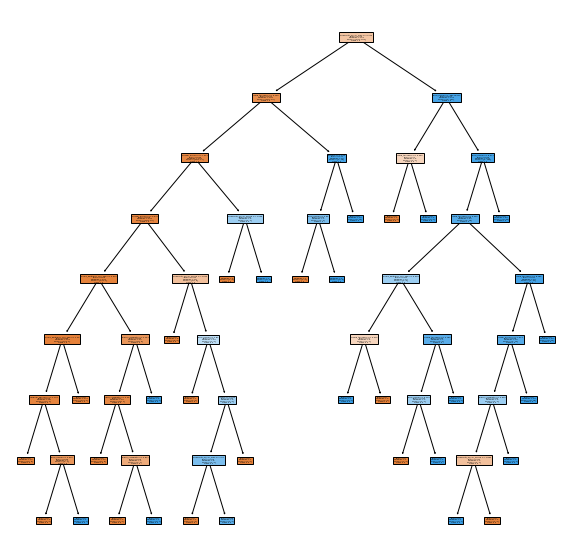

In [42]:
from sklearn.tree import plot_tree
plt.figure(figsize=(10, 10))
plot_tree(final_model_dt, feature_names=features, class_names=['2', '4'], filled=True)
plt.show()

#### Afficher l'arbre sous forme de régles de décision

In [43]:
from sklearn.tree import export_text
print(export_text(final_model_dt,feature_names=features,show_weights=True ))

|--- uniformity_of_cell_size <= 3.44
|   |--- clump_thickness <= 6.44
|   |   |--- normal_nucleoli <= 7.95
|   |   |   |--- normal_nucleoli <= 2.65
|   |   |   |   |--- single_epithelial_cell_size <= 2.65
|   |   |   |   |   |--- single_epithelial_cell_size <= 1.49
|   |   |   |   |   |   |--- marginal_adhesion <= 1.72
|   |   |   |   |   |   |   |--- weights: [31.00, 0.00] class: 2
|   |   |   |   |   |   |--- marginal_adhesion >  1.72
|   |   |   |   |   |   |   |--- bare_nuclei <= 3.64
|   |   |   |   |   |   |   |   |--- weights: [6.00, 0.00] class: 2
|   |   |   |   |   |   |   |--- bare_nuclei >  3.64
|   |   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 4
|   |   |   |   |   |--- single_epithelial_cell_size >  1.49
|   |   |   |   |   |   |--- weights: [217.00, 0.00] class: 2
|   |   |   |   |--- single_epithelial_cell_size >  2.65
|   |   |   |   |   |--- bland_chromatin <= 4.18
|   |   |   |   |   |   |--- bland_chromatin <= 2.46
|   |   |   |   |   |   |   |--- we

#### Tracer la matrice de confusion de __`final_model_dt`__

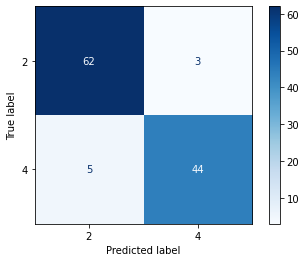

In [44]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(final_model_dt, X_test, y_test,cmap=plt.cm.Blues)  
plt.show()

### Afficher le __`classification_report`__ de __`final_model_dt`__

In [46]:
from sklearn.metrics import classification_report
ypred = final_model_dt.predict(X_test)
print(classification_report(y_test, ypred))

              precision    recall  f1-score   support

           2       0.93      0.95      0.94        65
           4       0.94      0.90      0.92        49

    accuracy                           0.93       114
   macro avg       0.93      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114



# LogisticRegression (SVM)

# Vous allez suivre pratiquement le même raisonnement. vous allez répondre aux même questions déjà posées

In [47]:
# Chargement de LogisticRegression
from sklearn.linear_model import LogisticRegression

In [53]:
param_grid={'penalty': ['l1', 'l2','elasticnet','none'] ,'solver' : ['newton-cg','lbfgs', 'liblinear', 'sag', 'saga'],'multi_class':['auto', 'ovr', 'multinomial']}
log_reg = LogisticRegression( )
log_reg=GridSearchCV(log_reg, param_grid, cv=5)
log_reg.fit(X_train, y_train)

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Asus\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\model_selection\_va

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'multi_class': ['auto', 'ovr', 'multinomial'],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']})

In [49]:
log_reg.best_params_

{'multi_class': 'ovr', 'penalty': 'l1', 'solver': 'liblinear'}

In [50]:
final_model_dt = LogisticRegression(multi_class='auto', penalty='l2', solver ='liblinear')
final_model_dt.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

#### Tracer la matrice de confusion de __`....`__

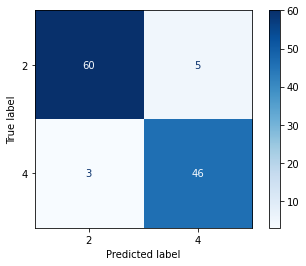

In [51]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(log_reg, X_test, y_test,cmap=plt.cm.Blues)  
plt.show()

### Afficher le __`classification_report`__ de __`....`__

In [52]:
from sklearn.metrics import classification_report
ypred = log_reg.predict(X_test)
print(classification_report(y_test, ypred))

              precision    recall  f1-score   support

           2       0.95      0.92      0.94        65
           4       0.90      0.94      0.92        49

    accuracy                           0.93       114
   macro avg       0.93      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114



# GaussianNB (Gaussian Naive Bayes)

# Vous allez suivre pratiquement le même raisonnement. vous allez répondre aux même questions déjà posées

In [ ]:
# Chargement de GaussianNB
from sklearn.naive_bayes import GaussianNB

#### Créer une instance __`model`__ de l'algorithme de classification par GaussianNB.
#### Entrainer __`model`__ sur le sous-ensemble de données approprié.

In [ ]:
model = GaussianNB(priors=None, var_smoothing=1e-09)


In [ ]:
model.fit(X_train,y_train)

#### Tracer la matrice de confusion de __`model`__

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(gnb, X_test, y_test,cmap=plt.cm.Blues)  
plt.show()

### Afficher le __`classification_report`__ de __`model`__

In [ ]:
from sklearn.metrics import classification_report
ypred = gnb.predict(X_test)
print(classification_report(y_test, ypred))

# Etude compartive

| Algorithm          | weighted_avg_recall | weighted_avg_precsion | weighted_avg_F1-score|
|--------------------|---------------------|-----------------------|----------------------|
| KNN                | 0.93                | 0.93                  | 0.93                 |
| Decision Tree      | 0.92                | 0.92                  | 0.92                 |
| GaussianNB         | 0.94                | 0.94                  | 0.94                 |
| LogisticRegression | 0.94                | 0.94                  | 0.94                 |

In [ ]:
le meilleur algorithme est le LogisticRegression et le GaussianNB car il ont les meme et meilleurs valeurs